In [1]:
import pandas as pd

df = pd.read_csv('TikTok_data_all_July2023.csv')
df = df[(df['video_locationcreated']!='DE') & (df['video_locationcreated']!='TH')]
df = df[(df['langdetect']!='pl') & (df['langdetect']!='ru') & (df['langdetect']!='sw') & (df['langdetect']!='fr')
       & (df['langdetect']!='uk')]

In [2]:
df.shape

(17275, 22)

In [3]:
df = df.dropna(subset='video_description')

In [4]:
#delete '#'
#stopwords: 'fyp'..

df['video_description'] = df['video_description'].str.replace('#', ' ')

df_text = df[['video_description']]

In [5]:
#preprocessing.. only take nouns, verbs?
#https://machinelearningknowledge.ai/11-techniques-of-text-preprocessing-using-nltk-in-python/

#1.lower casing
df['video_description']= df['video_description'].str.lower()
df.head()

,Unnamed: 0.1,Unnamed: 0,video_id,video_timestamp,video_duration,video_locationcreated,video_diggcount,video_sharecount,video_commentcount,video_playcount,...,video_stickers,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,langdetect
0,0,0,7188504983514385669,2023-01-14T07:50:47,15,BE,15,0,3,119,...,NaN,juulszepeto,Juuls🫶🏻,NaN,NaN,NaN,NaN,NaN,False,cy
1,1,1,6956184653493456133,2021-04-28T07:29:16,7,US,154,0,1,748,...,NaN,rissriss89,Marissa Bryant941,NaN,NaN,NaN,NaN,NaN,False,error
2,2,2,6765926118814960901,2019-12-02T13:29:00,9,US,230,15,1,4610,...,NaN,bj.woo,BJ WOO,NaN,NaN,NaN,NaN,NaN,False,id
4,4,4,6687172647320554757,2019-05-04T09:05:12,14,US,27,0,2,704,...,NaN,thetrevorfox,TheTrevorFox,NaN,NaN,NaN,NaN,NaN,False,tl
5,5,5,6687172647320554757,2019-05-04T09:05:12,14,US,27,0,2,704,...,NaN,thetrevorfox,TheTrevorFox,NaN,NaN,NaN,NaN,NaN,False,tl


In [6]:
#drop duplication

df = df.drop_duplicates(subset='video_id')
df.shape

(14002, 22)

In [193]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)
    
    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)
    
    # 단어 원형 추출
    return LemTokens(word_tokens)

In [194]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english' , ngram_range=(1,2), 
                             tokenizer = LemNormalize, min_df=0.05, max_df=0.85)

# 피처 벡터화: TF-IDF
feature_vect = tfidf_vect.fit_transform(df['video_description'].values.astype('U'))
#feature_vect = tfidf_vect.fit_transform(df['video_description'])

/Users/sungwonj/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


k : 2 inertia : 9542.544750616385
k : 3 inertia : 8834.967654398206
k : 4 inertia : 8271.344415133877
k : 5 inertia : 7662.278514279061
k : 6 inertia : 7161.475664738757
k : 7 inertia : 6662.363196649361
k : 8 inertia : 6101.618056161324
k : 9 inertia : 5696.516266046754
k : 10 inertia : 5163.666870063761
k : 11 inertia : 4735.834791064815
k : 12 inertia : 4388.442771512529
k : 13 inertia : 3960.7967865475575
k : 14 inertia : 3723.961820570341
k : 15 inertia : 3397.8037432343053
k : 16 inertia : 3157.882380287745
k : 17 inertia : 3007.850733899746
k : 18 inertia : 2823.3653103210017
k : 19 inertia : 2775.766040539955
k : 20 inertia : 2655.855596390934
k : 21 inertia : 2570.618531876513
k : 22 inertia : 2494.324285018345
k : 23 inertia : 2451.7985902836854
k : 24 inertia : 2384.85361815299
k : 25 inertia : 2333.6694006948064
k : 26 inertia : 2285.202269257189
k : 27 inertia : 2239.3147038214656
k : 28 inertia : 2189.074658142145
k : 29 inertia : 2178.7335661511315


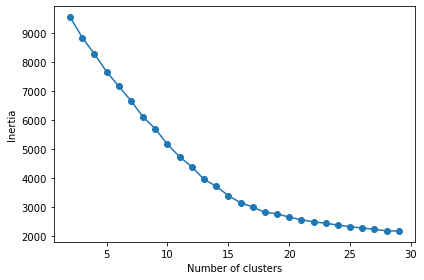

In [195]:
#elbow method with plot

import numpy as np

inertia_arr = [] 
k_range = range(2,30)

for k in k_range:
    Kmeans = KMeans(n_clusters=k, random_state=200)
    Kmeans.fit(feature_vect)
    inertia = Kmeans.inertia_
    inertia_arr.append(inertia)
    
    print('k :', k, 'inertia :', inertia)
    
plt.plot(range(2,30), inertia_arr, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

In [196]:
from sklearn.cluster import KMeans

# KMeans: 15
km_cluster = KMeans(n_clusters=15, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)

# cluster 및 중심 좌표 정보
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# cluster 라벨 추가
df['cluster_label'] = cluster_label
df.head()

,Unnamed: 0.1,Unnamed: 0,video_id,video_timestamp,video_duration,video_locationcreated,video_diggcount,video_sharecount,video_commentcount,video_playcount,...,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,langdetect,cluster_label
0,0,0,7188504983514385669,2023-01-14T07:50:47,15,BE,15,0,3,119,...,juulszepeto,Juuls🫶🏻,NaN,NaN,NaN,NaN,NaN,False,cy,12
1,1,1,6956184653493456133,2021-04-28T07:29:16,7,US,154,0,1,748,...,rissriss89,Marissa Bryant941,NaN,NaN,NaN,NaN,NaN,False,error,3
2,2,2,6765926118814960901,2019-12-02T13:29:00,9,US,230,15,1,4610,...,bj.woo,BJ WOO,NaN,NaN,NaN,NaN,NaN,False,id,14
4,4,4,6687172647320554757,2019-05-04T09:05:12,14,US,27,0,2,704,...,thetrevorfox,TheTrevorFox,NaN,NaN,NaN,NaN,NaN,False,tl,7
7,7,7,7197833860095282475,2023-02-08T11:11:43,10,US,42,2,1,964,...,_kkutos,NaN,NaN,NaN,NaN,NaN,NaN,False,error,2


In [198]:
df['cluster_label'].value_counts()

3     2195
7     1554
1     1272
2     1160
14     850
5      831
4      749
9      739
10     719
6      707
12     702
0      682
8      679
11     650
13     513
Name: cluster_label, dtype: int64

In [199]:
kmeans_cluster_0 = df[df['cluster_label'] == 0]
kmeans_cluster_1 = df[df['cluster_label'] == 1]
kmeans_cluster_2 = df[df['cluster_label'] == 2]
kmeans_cluster_3 = df[df['cluster_label'] == 3]
kmeans_cluster_4 = df[df['cluster_label'] == 4]

kmeans_cluster_5 = df[df['cluster_label'] == 5]
kmeans_cluster_6 = df[df['cluster_label'] == 6]
kmeans_cluster_7 = df[df['cluster_label'] == 7]
kmeans_cluster_8 = df[df['cluster_label'] == 8]
kmeans_cluster_9 = df[df['cluster_label'] == 9]

kmeans_cluster_10 = df[df['cluster_label'] == 10]
kmeans_cluster_11 = df[df['cluster_label'] == 11]
kmeans_cluster_12 = df[df['cluster_label'] == 12]
kmeans_cluster_13 = df[df['cluster_label'] == 13]
kmeans_cluster_14 = df[df['cluster_label'] == 14]


In [200]:
print(len(kmeans_cluster_0))
print(len(kmeans_cluster_1))
print(len(kmeans_cluster_2))
print(len(kmeans_cluster_3))
print(len(kmeans_cluster_4))

print('*' * 20)
print(len(kmeans_cluster_5))
print(len(kmeans_cluster_6))
print(len(kmeans_cluster_7))
print(len(kmeans_cluster_8))
print(len(kmeans_cluster_9))
print('*' * 20)


print(len(kmeans_cluster_10))
print(len(kmeans_cluster_11))
print(len(kmeans_cluster_12))
print(len(kmeans_cluster_13))
print(len(kmeans_cluster_14))

682
1272
1160
2195
749
********************
831
707
1554
679
739
********************
719
650
702
513
850


In [201]:
kmeans_cluster_0.to_csv('/Users/sungwonj/Desktop/utaustin/cml/VAMOS/clustering_results/kmeans/clusternum_15/cluster_0.csv',
                       encoding='utf-8-sig')
kmeans_cluster_1.to_csv('/Users/sungwonj/Desktop/utaustin/cml/VAMOS/clustering_results/kmeans/clusternum_15/cluster_1.csv',
                       encoding='utf-8-sig')
kmeans_cluster_2.to_csv('/Users/sungwonj/Desktop/utaustin/cml/VAMOS/clustering_results/kmeans/clusternum_15/cluster_2.csv',
                       encoding='utf-8-sig')
kmeans_cluster_3.to_csv('/Users/sungwonj/Desktop/utaustin/cml/VAMOS/clustering_results/kmeans/clusternum_15/cluster_3.csv',
                       encoding='utf-8-sig')
kmeans_cluster_4.to_csv('/Users/sungwonj/Desktop/utaustin/cml/VAMOS/clustering_results/kmeans/clusternum_15/cluster_4.csv',
                       encoding='utf-8-sig')

kmeans_cluster_5.to_csv('/Users/sungwonj/Desktop/utaustin/cml/VAMOS/clustering_results/kmeans/clusternum_15/cluster_5.csv',
                       encoding='utf-8-sig')
kmeans_cluster_6.to_csv('/Users/sungwonj/Desktop/utaustin/cml/VAMOS/clustering_results/kmeans/clusternum_15/cluster_6.csv',
                       encoding='utf-8-sig')
kmeans_cluster_7.to_csv('/Users/sungwonj/Desktop/utaustin/cml/VAMOS/clustering_results/kmeans/clusternum_15/cluster_7.csv',
                       encoding='utf-8-sig')
kmeans_cluster_8.to_csv('/Users/sungwonj/Desktop/utaustin/cml/VAMOS/clustering_results/kmeans/clusternum_15/cluster_8.csv',
                       encoding='utf-8-sig')
kmeans_cluster_9.to_csv('/Users/sungwonj/Desktop/utaustin/cml/VAMOS/clustering_results/kmeans/clusternum_15/cluster_9.csv',
                       encoding='utf-8-sig')

kmeans_cluster_10.to_csv('/Users/sungwonj/Desktop/utaustin/cml/VAMOS/clustering_results/kmeans/clusternum_15/cluster_10.csv',
                       encoding='utf-8-sig')
kmeans_cluster_11.to_csv('/Users/sungwonj/Desktop/utaustin/cml/VAMOS/clustering_results/kmeans/clusternum_15/cluster_11.csv',
                       encoding='utf-8-sig')
kmeans_cluster_12.to_csv('/Users/sungwonj/Desktop/utaustin/cml/VAMOS/clustering_results/kmeans/clusternum_15/cluster_12.csv',
                       encoding='utf-8-sig')
kmeans_cluster_13.to_csv('/Users/sungwonj/Desktop/utaustin/cml/VAMOS/clustering_results/kmeans/clusternum_15/cluster_13.csv',
                       encoding='utf-8-sig')
kmeans_cluster_14.to_csv('/Users/sungwonj/Desktop/utaustin/cml/VAMOS/clustering_results/kmeans/clusternum_15/cluster_14.csv',
                       encoding='utf-8-sig')

In [118]:
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)
            
    return result

df['video_description'] = df['video_description'].apply(remove_stopwords)

In [118]:
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)
            
    return result

df['video_description'] = df['video_description'].apply(remove_stopwords)

In [51]:
#https://wonhwa.tistory.com/28

#elbow method 적용

import numpy as np

inertia_arr = []
k_range = range(2,15)

for k in k_range:
    Kmeans = KMeans(n_clusters=k, random_state=200)
    Kmeans.fit(feature_vect)
    inertia = Kmeans.inertia_
    
    print('k :', k, 'inertia :', inertia)
    
inertia_arr = np.array(inertia_arr)

k : 2 inertia : 13692.39002568898
k : 3 inertia : 12602.149750244944
k : 4 inertia : 11362.43884283618
k : 5 inertia : 10826.431218739328
k : 6 inertia : 9957.838747819276
k : 7 inertia : 9054.769204550843
k : 8 inertia : 8261.748078366832
k : 9 inertia : 7565.630445553065
k : 10 inertia : 6954.318874313554
k : 11 inertia : 6352.108941304288
k : 12 inertia : 5866.380873493961
k : 13 inertia : 5379.473744524804
k : 14 inertia : 4999.614597918807


In [28]:
#elbow method with plot

import numpy as np

inertia_arr = [] 
k_range = range(2,30)

for k in k_range:
    Kmeans = KMeans(n_clusters=k, random_state=200)
    Kmeans.fit(feature_vect)
    inertia = Kmeans.inertia_
    inertia_arr.append(inertia)
    
    print('k :', k, 'inertia :', inertia)
    
plt.plot(range(2,30), inertia_arr, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

k : 2 inertia : 11337.189919389166
k : 3 inertia : 10494.305638004045
k : 4 inertia : 9893.834933184618
k : 5 inertia : 9085.50944575706
k : 6 inertia : 8546.848923958602
k : 7 inertia : 7937.181666322503
k : 8 inertia : 7369.243651796226
k : 9 inertia : 6905.689445863973
k : 10 inertia : 6389.505828449155
k : 11 inertia : 6039.373061737435
k : 12 inertia : 5447.462916731398
k : 13 inertia : 5140.13699851923
k : 14 inertia : 4705.9573679092555
k : 15 inertia : 4386.423131481919
k : 16 inertia : 4151.409058660908
k : 17 inertia : 3827.286360460572
k : 18 inertia : 3637.1284107610745
k : 19 inertia : 3395.4529423263475
k : 20 inertia : 3323.359724461891
k : 21 inertia : 3230.6179110784797
k : 22 inertia : 3059.087674030605
k : 23 inertia : 3011.9833650479295
k : 24 inertia : 2906.895139369502
k : 25 inertia : 2875.647963827659
k : 26 inertia : 2821.538159522101
k : 27 inertia : 2790.590477396695
k : 28 inertia : 2734.2736068438553
k : 29 inertia : 2684.087042510794


NameError: name 'plt' is not defined

k : 2 inertia : 13692.390025688997
k : 3 inertia : 12602.149750244944
k : 4 inertia : 11362.43884283618
k : 5 inertia : 10826.431218739328
k : 6 inertia : 9957.838747819276
k : 7 inertia : 9054.769204550841
k : 8 inertia : 8261.748078366832
k : 9 inertia : 7565.630445553065
k : 10 inertia : 6954.318874313554
k : 11 inertia : 6352.108941304288
k : 12 inertia : 5866.380873493961
k : 13 inertia : 5379.473744524805
k : 14 inertia : 4999.614597918808
k : 15 inertia : 4625.44733331649
k : 16 inertia : 4309.411093542353
k : 17 inertia : 3978.038363426376
k : 18 inertia : 3753.766851498411
k : 19 inertia : 3608.2707492274976
k : 20 inertia : 3447.4187159126445
k : 21 inertia : 3419.2665062972005
k : 22 inertia : 3260.371145882932
k : 23 inertia : 3184.042346660909
k : 24 inertia : 3150.0373062404005
k : 25 inertia : 3065.747750132166
k : 26 inertia : 3007.450149154602
k : 27 inertia : 2961.4391707119826
k : 28 inertia : 2877.6069950498986
k : 29 inertia : 2823.5378480440254


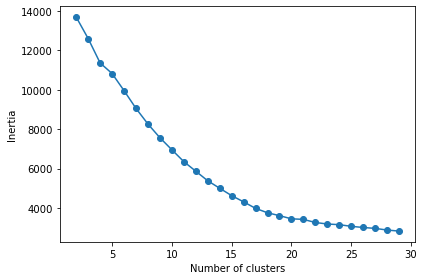

In [52]:
#elbow method with plot

import numpy as np

inertia_arr = []
k_range = range(2,30)

for k in k_range:
    Kmeans = KMeans(n_clusters=k, random_state=200)
    Kmeans.fit(feature_vect)
    inertia = Kmeans.inertia_
    inertia_arr.append(inertia)
    
    print('k :', k, 'inertia :', inertia)
    
plt.plot(range(2,30), inertia_arr, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

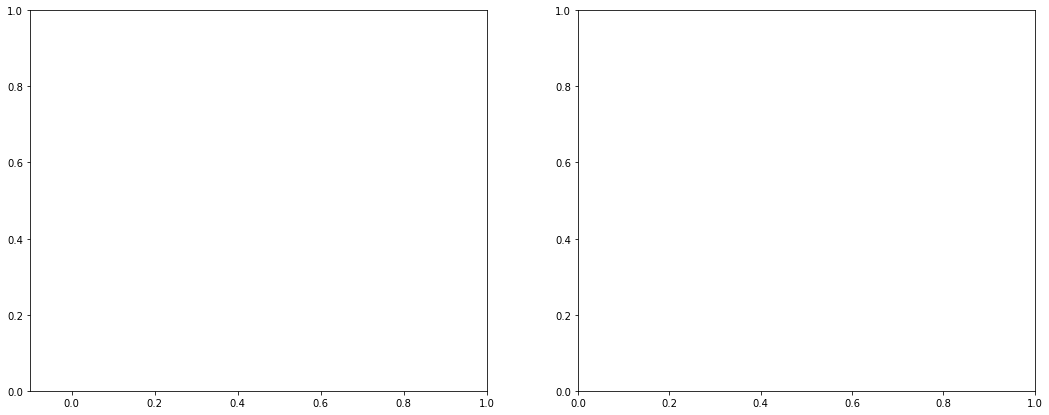

## kmeans cluster index - extract main words

In [75]:
import pandas as pd

df = pd.read_csv('TikTok_data_all_July2023.csv')
df = df[df['video_locationcreated']!='DE']
df = df[(df['langdetect']!='pl') & (df['langdetect']!='ru') & (df['langdetect']!='sw') & (df['langdetect']!='fr')]

In [76]:
df.shape

(17532, 22)

In [77]:
df = df.dropna(subset='video_description')

In [78]:
#delete '#'
#stopwords: 'fyp'..

df['video_description'] = df['video_description'].str.replace('#', ' ')

df_text = df[['video_description']]

In [79]:
#preprocessing.. only take nouns, verbs?
#https://machinelearningknowledge.ai/11-techniques-of-text-preprocessing-using-nltk-in-python/

#1.lower casing
df['video_description']= df['video_description'].str.lower()
df.head()

,Unnamed: 0.1,Unnamed: 0,video_id,video_timestamp,video_duration,video_locationcreated,video_diggcount,video_sharecount,video_commentcount,video_playcount,...,video_stickers,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,langdetect
0,0,0,7188504983514385669,2023-01-14T07:50:47,15,BE,15,0,3,119,...,NaN,juulszepeto,Juuls🫶🏻,NaN,NaN,NaN,NaN,NaN,False,cy
1,1,1,6956184653493456133,2021-04-28T07:29:16,7,US,154,0,1,748,...,NaN,rissriss89,Marissa Bryant941,NaN,NaN,NaN,NaN,NaN,False,error
2,2,2,6765926118814960901,2019-12-02T13:29:00,9,US,230,15,1,4610,...,NaN,bj.woo,BJ WOO,NaN,NaN,NaN,NaN,NaN,False,id
4,4,4,6687172647320554757,2019-05-04T09:05:12,14,US,27,0,2,704,...,NaN,thetrevorfox,TheTrevorFox,NaN,NaN,NaN,NaN,NaN,False,tl
5,5,5,6687172647320554757,2019-05-04T09:05:12,14,US,27,0,2,704,...,NaN,thetrevorfox,TheTrevorFox,NaN,NaN,NaN,NaN,NaN,False,tl


In [80]:
df['video_description']

0        you can be the cash i’ll be the rubber band🫶🏻 ...
1                                   newfriends  dab  juuls
2                                        juul phene  juuls
4        part 2 adventures of the mafia  foryou  themaf...
5        part 2 adventures of the mafia  foryou  themaf...
                               ...                        
19978    aspire one up r1 5000 puffs bubblegum ice @asp...
19979    reply to @jessicamunromendes12   greenscreen  ...
19980    do you like it? vape  vaper  vapeusa  fyp  vap...
19982    voom iris mini 600 puffs disposable vape. many...
19983    box disposable vape,3000puffs  vape  vaper  di...
Name: video_description, Length: 16197, dtype: object

In [81]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 단어 원형| 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)
    
    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)
    
    # 단어 원형 추출
    return LemTokens(word_tokens)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english' , ngram_range=(1,2), 
                             tokenizer = LemNormalize, min_df=0.05, max_df=0.85)

# 피처 벡터화: TF-IDF
feature_vect = tfidf_vect.fit_transform(df['video_description'])

/Users/sungwonj/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [83]:
from sklearn.cluster import KMeans

# KMeans: 15
km_cluster = KMeans(n_clusters=15, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)

# cluster 및 중심 좌표 정보
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# cluster 라벨 추가
df['cluster_label'] = cluster_label
df.head()

,Unnamed: 0.1,Unnamed: 0,video_id,video_timestamp,video_duration,video_locationcreated,video_diggcount,video_sharecount,video_commentcount,video_playcount,...,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,langdetect,cluster_label
0,0,0,7188504983514385669,2023-01-14T07:50:47,15,BE,15,0,3,119,...,juulszepeto,Juuls🫶🏻,NaN,NaN,NaN,NaN,NaN,False,cy,2
1,1,1,6956184653493456133,2021-04-28T07:29:16,7,US,154,0,1,748,...,rissriss89,Marissa Bryant941,NaN,NaN,NaN,NaN,NaN,False,error,4
2,2,2,6765926118814960901,2019-12-02T13:29:00,9,US,230,15,1,4610,...,bj.woo,BJ WOO,NaN,NaN,NaN,NaN,NaN,False,id,6
4,4,4,6687172647320554757,2019-05-04T09:05:12,14,US,27,0,2,704,...,thetrevorfox,TheTrevorFox,NaN,NaN,NaN,NaN,NaN,False,tl,8
5,5,5,6687172647320554757,2019-05-04T09:05:12,14,US,27,0,2,704,...,thetrevorfox,TheTrevorFox,NaN,NaN,NaN,NaN,NaN,False,tl,8


In [54]:
df[df['cluster_label']==0].sort_values(by='video_id')

,Unnamed: 0.1,Unnamed: 0,video_id,video_timestamp,video_duration,video_locationcreated,video_diggcount,video_sharecount,video_commentcount,video_playcount,...,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,langdetect,cluster_label
14347,14350,438,6802375485750873349,2020-03-09T19:51:07,9,US,175600,10000,1758,1300000,...,hansahola,Hans Ahola,NaN,NaN,NaN,NaN,NaN,False,error,0
261,261,261,6810268217219632389,2020-03-31T02:19:11,48,US,30,0,2,173,...,synonymrollzz,Alayia🤍,NaN,NaN,NaN,NaN,NaN,False,id,0
215,215,215,6820595270150098182,2020-04-27T22:13:08,11,US,375,18,9,9608,...,officialjayd_,Jayda🖤,NaN,NaN,NaN,NaN,NaN,False,vi,0
216,216,216,6820595270150098182,2020-04-27T22:13:08,11,US,375,18,9,9608,...,officialjayd_,Jayda🖤,NaN,NaN,NaN,NaN,NaN,False,vi,0
16575,16578,929,6841134232832576773,2020-06-22T06:34:50,59,CA,209500,201,229,867800,...,0liviamillerr,Liv,NaN,NaN,NaN,NaN,NaN,False,af,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10356,10359,414,7241033603516255493,2023-06-04T22:08:38,17,ID,34,0,7,648,...,min_wave1310,semangatcaricuan🤑,NaN,NaN,NaN,NaN,NaN,False,tr,0
3259,3261,537,7241278824879508741,2023-06-05T14:00:15,25,TR,5734,88,20,40900,...,serkan.ayd34,Serkan.ayd34,NaN,NaN,NaN,NaN,NaN,False,error,0
10161,10164,219,7242180650738945285,2023-06-08T00:19:44,12,ID,32,0,0,1262,...,hex.mod,HEXMOD,NaN,NaN,NaN,NaN,NaN,False,tl,0
6194,6197,265,7242524007365364993,2023-06-08T22:32:11,60,LK,572,0,19,2642,...,crush_officia0,Madu Babha..❤️⃟⃟◍̸̸̸̸̣̣̣❀,NaN,NaN,NaN,NaN,NaN,False,error,0


In [122]:
cluster_centers = km_cluster.cluster_centers_

print('cluster_centers shape :', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (15, 18)
[[0.00000000e+00 9.87249175e-04 0.00000000e+00 1.85856123e-01
  1.87357264e-04 1.12069914e-02 7.31440319e-03 4.29358545e-02
  3.40027653e-04 1.91466748e-04 1.67384323e-04 3.19464702e-02
  1.88560746e-04 0.00000000e+00 7.90930154e-02 9.65762375e-04
  7.37541893e-03 1.71459591e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.81071604e-03
  4.61243813e-04 1.00537494e-02 3.31717300e-03 1.76630883e-01
  6.08913844e-03 4.68955529e-03 1.33452973e-03 9.05542479e-01
  0.00000000e+00 1.10514263e-02 4.80280835e-03 1.59576048e-02
  1.58735588e-02 4.65300025e-04]
 [2.02941660e-02 1.39767357e-02 7.95269351e-03 3.64560015e-02
  8.93579628e-03 4.29370554e-01 3.47757094e-01 2.92250712e-01
  1.02385359e-01 7.92868493e-03 6.21827235e-02 1.21572966e-01
  9.07479976e-04 2.10647860e-02 2.35768059e-02 2.71463998e-02
  2.99972407e-01 9.25106006e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.92185021e-03
  0.00000000e+00 8.43385134e-02 6.63132143e-02 1.29876240e-01


In [123]:
def get_cluster_details(cluster_model, cluster_data, cluster_nums, 
                        feature_names, top_n_features=10):
    
    # 핵심 단어 등 정보를 담을 사전 생성
    cluster_details = {}
    
    # word 피처 중심과의 거리 내림차순 정렬시 값들의 index 반환
    center_info = cluster_model.cluster_centers_        # 군집 중심 정보
    center_descend_ind = center_info.argsort()[:, ::-1] # 행별(군집별)로 역순 정렬
    
    # 군집별 정보 담기
    for i in range(cluster_nums):
        # 군집별 정보를 담을 데이터 초기화
        cluster_details[i] = {} # 사전 안에 사전
        
        # 각 군집에 속하는 파일명
        filenames = cluster_data[cluster_data["cluster_label"] == i]["video_id"]
        filenames = filenames.values.tolist()
        
        # 군집별 중심 정보
        top_feature_values = center_info[i, :top_n_features].tolist()

        # 군집별 핵심 단어 피처명
        top_feature_indexes = center_descend_ind[i, :top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]
        
        # 각 군집별 정보 사전에 담기
        cluster_details[i]["cluster"] = i                              # i번째 군집
        cluster_details[i]["top_features"] = top_features              # 군집별 핵심 단어
        cluster_details[i]["top_feature_values"] = top_feature_values  # 군집별 중심 정보
        cluster_details[i]["video_id"] = filenames                    # 군집 속 파일명
        
    return cluster_details

In [124]:
# TF-IDF 객체의 전체 word 명칭
feature_names = tfidf_vect.get_feature_names()

# 함수 적용
cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=df, cluster_nums=15,
                                  feature_names=feature_names, top_n_features=50 )

/Users/sungwonj/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [125]:
cluster_details.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [126]:
for cluster_num, cluster_detail in cluster_details.items():
        print(f"####### Cluster {cluster_num}")
        print(f"Top features: {cluster_detail['top_features']}")
        print(f"Reviews 파일명: {cluster_detail['video_id'][:3]}")
        print("-"*120)

####### Cluster 0
Top features: ['elfbar', 'vapetok', 'fyp', 'vape', 'foryou', 'viral', 'foryoupage', 'disposable', 'vaping', 'fypシ', 'juul', 'vapear', 'eliquid', '’', 'lostmary', 'ejuice', 'vaper', 'blinker']
Reviews 파일명: [6956184653493456133, 6661439930050284806, 6994070838014184710]
------------------------------------------------------------------------------------------------------------------------
####### Cluster 1
Top features: ['vape', 'fyp', 'vaping', 'viral', 'vaper', 'foryou', 'fypシ', 'vapetok', 'juul', 'elfbar', 'foryoupage', 'lostmary', '’', 'eliquid', 'vapear', 'ejuice', 'disposable', 'blinker']
Reviews 파일명: [7197833860095282475, 6728935739670744325, 6839915820080958726]
------------------------------------------------------------------------------------------------------------------------
####### Cluster 2
Top features: ['foryou', 'foryoupage', 'viral', 'fyp', 'vape', 'fypシ', 'lostmary', 'elfbar', 'vaping', 'vapetok', 'vaper', 'blinker', 'disposable', '’', 'eliquid', 'e

In [90]:
cluster_details

{0: {'cluster': 0,
  'top_features': ['fypシ',
   'fyp',
   'vape',
   'vaping',
   'ejuice',
   'vaper',
   'viral',
   'foryoupage',
   'foryou',
   '’',
   'vapear',
   'juul',
   'lostmary',
   'eliquid',
   'elfbar',
   'disposable',
   'cartridge',
   'blinker'],
  'top_feature_values': [0.0,
   0.0,
   0.0,
   0.08072129824649464,
   0.0,
   0.0,
   0.03245920857629796,
   0.05036275701356483,
   0.16768321469687703,
   0.7733925036278124,
   0.0,
   0.0,
   0.15641939124181353,
   0.000454601656671648,
   0.05324864048865991,
   0.09035149794391976,
   0.050553307719020925,
   0.021055024591977212],
  'video_id': [7207828522969074986,
   7024803468430920965,
   7202039906762329387,
   7194456392260980010,
   7194456392260980010,
   7011578211620490501,
   7117247794968005894,
   7221290816063474987,
   7159038482516544811,
   7239055754974612778,
   6921038061073681670,
   7207666294588624174,
   6820595270150098182,
   6820595270150098182,
   6810268217219632389,
   71603739294

In [88]:
#silhouette score: clustering validity index 중 하나
#https://steadiness-193.tistory.com/284


#the better if the score closes to 1

from sklearn.metrics import silhouette_score

k_range = range(2,30)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=200)
    kmeans.fit(feature_vect)
    clusters = kmeans.predict(feature_vect)
    
    score = silhouette_score(feature_vect, clusters)
    print('k :', k, 'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score
        
print('best n :', best_n, 'best_score :', best_silhouette_score)

k : 2 score : 0.11320587878361298
k : 3 score : 0.13429117666408147
k : 4 score : 0.15250410138261142
k : 5 score : 0.18491787668759677
k : 6 score : 0.20163624504077557
k : 7 score : 0.23081374130366203
k : 8 score : 0.2501812166688491
k : 9 score : 0.26695992276855196
k : 10 score : 0.29107924195969936
k : 11 score : 0.3077002287749685
k : 12 score : 0.33567365700222784
k : 13 score : 0.3504670825325805
k : 14 score : 0.3740031850662209
k : 15 score : 0.3894347154038422
k : 16 score : 0.40202971530734105
k : 17 score : 0.4181185044797591
k : 18 score : 0.42732958679367455
k : 19 score : 0.43704670697302467
k : 20 score : 0.4418575276718473
k : 21 score : 0.4438227081072269
k : 22 score : 0.46780039191920547
k : 23 score : 0.4698677866533108
k : 24 score : 0.47820800882168707
k : 25 score : 0.4785117541385202
k : 26 score : 0.48345313589535743
k : 27 score : 0.4822114253288299
k : 28 score : 0.485042278616068
k : 29 score : 0.49138210469361326
best n : 29 best_score : 0.49138210469361

k : 2 inertia : 11337.189919389166
k : 3 inertia : 10494.305638004045
k : 4 inertia : 9893.834933184618
k : 5 inertia : 9085.50944575706
k : 6 inertia : 8546.8489239586
k : 7 inertia : 7937.181666322504
k : 8 inertia : 7369.243651796226
k : 9 inertia : 6905.689445863973
k : 10 inertia : 6389.505828449153
k : 11 inertia : 6039.373061737434
k : 12 inertia : 5447.462916731398
k : 13 inertia : 5140.136998519229
k : 14 inertia : 4705.957367909256
k : 15 inertia : 4386.423131481915
k : 16 inertia : 4151.409058660909
k : 17 inertia : 3827.2863604605704
k : 18 inertia : 3637.1284107610754
k : 19 inertia : 3395.4529423263475
k : 20 inertia : 3323.359724461891
k : 21 inertia : 3230.6179110784797
k : 22 inertia : 3059.087674030605
k : 23 inertia : 3011.9833650479295
k : 24 inertia : 2906.895139369501
k : 25 inertia : 2875.647963827659
k : 26 inertia : 2821.538159522101
k : 27 inertia : 2790.590477396695
k : 28 inertia : 2734.273606843855
k : 29 inertia : 2684.087042510794


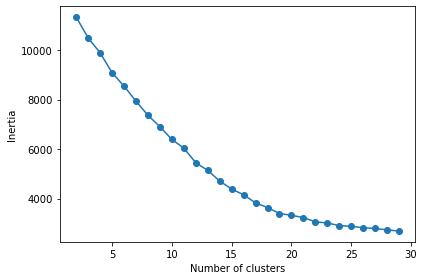

In [91]:
#elbow method with plot

import numpy as np

inertia_arr = [] 
k_range = range(2,30)

for k in k_range:
    Kmeans = KMeans(n_clusters=k, random_state=200)
    Kmeans.fit(feature_vect)
    inertia = Kmeans.inertia_
    inertia_arr.append(inertia)
    
    print('k :', k, 'inertia :', inertia)
    
plt.plot(range(2,30), inertia_arr, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

In [ ]:
distortions = []
for i in range(1, 30):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, random_state=0)
    km.fit(feature_vect)
    distortions.append(km.inertia_)

plt.plot(range(1, 30), distortions, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Distortion')
plt.show()

In [103]:
clusters_range = range(2,20)
results = []

for i in clusters_range:
    clusterer = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, random_state=0)
    cluster_labels = clusterer.fit_predict(feature_vect)
    silhouette_avg = silhouette_score(feature_vect, cluster_labels)
    results.append([i, silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

plt.figure()
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
plt.tight_layout()
plt.show()

NameError: name 'sns' is not defined

<Figure size 432x288 with 0 Axes>

# 2. DBSCAN

In [106]:
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)
            
    return result

df['video_description'] = df['video_description'].apply(remove_stopwords)

In [57]:
#https://hoonzi-text.tistory.com/19

from sklearn.feature_extraction.text import TfidfVectorizer

vector = tfidf_vect.fit_transform(df['video_description'].values.astype('U')).toarray()

In [58]:
from sklearn.cluster import DBSCAN
import numpy as np

vector = np.array(vector) # Normalizer를 이용해 변환된 벡터
model = DBSCAN(eps=0.3,min_samples=6, metric = "cosine")
# 거리 계산 식으로는 Cosine distance를 이용
result = model.fit_predict(vector)

In [59]:
df['result'] = result

In [61]:
df['result'].value_counts()

 0    17544
-1     2333
Name: result, dtype: int64

In [ ]:
for cluster_num in set(result):
    # -1,0은 노이즈 판별이 났거나 클러스터링이 안된 경우
    if(cluster_num == -1 or cluster_num == 0): 
        continue
    else:
        print("cluster num : {}".format(cluster_num))
        temp_df = df[df['result'] == cluster_num] # cluster num 별로 조회
        for title in temp_df['title']:
            print(title) # 제목으로 살펴보자
        print()

# 3. Hierachical Clustering

In [183]:
df['video_description']

0        you can be the cash i’ll be the rubber band🫶🏻 ...
1                                   newfriends  dab  juuls
2                                        juul phene  juuls
4        part 2 adventures of the mafia  foryou  themaf...
5        part 2 adventures of the mafia  foryou  themaf...
                               ...                        
19978    aspire one up r1 5000 puffs bubblegum ice @asp...
19979    reply to @jessicamunromendes12   greenscreen  ...
19980    do you like it? vape  vaper  vapeusa  fyp  vap...
19982    voom iris mini 600 puffs disposable vape. many...
19983    box disposable vape,3000puffs  vape  vaper  di...
Name: video_description, Length: 16197, dtype: object

In [184]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(stop_words=en_stopwords)
bow = vector.fit_transform(df['video_description'].values.astype('U'))  # Bag of words 만들기


# Bag of Words를 데이터 프레임으로 저장

import pandas as pd

# 딕셔너리 데이터를 쌍(items(key, value))으로 불러와 두 번째 값(value)으로 정렬해 컬럼명을 만듦
columns = []
for k, v in sorted(vector.vocabulary_.items(), key=lambda item:item[1]): 
  columns.append(k)

df = pd.DataFrame(bow.toarray(), columns = columns) # DTM 만들기
df_tdm = df.T                                     # TDM 만들기

In [185]:
df_tdm['total'] = df_tdm.sum(axis=1)     # 단어 총 빈도수 계산
df_words = df_tdm[df_tdm['total'].rank(ascending=False) <= 50] # 빈도수 상위 50개 추출
df_words= df_words.drop('total', axis=1)    # 컬럼 'total' 제거
df_words[:5]

,0,1,2,3,4,5,6,7,8,9,...,16187,16188,16189,16190,16191,16192,16193,16194,16195,16196
blinker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
blinkers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
boxmod,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cartridge,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
carts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/Users/sungwonj/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sungwonj/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0, flags=flags)


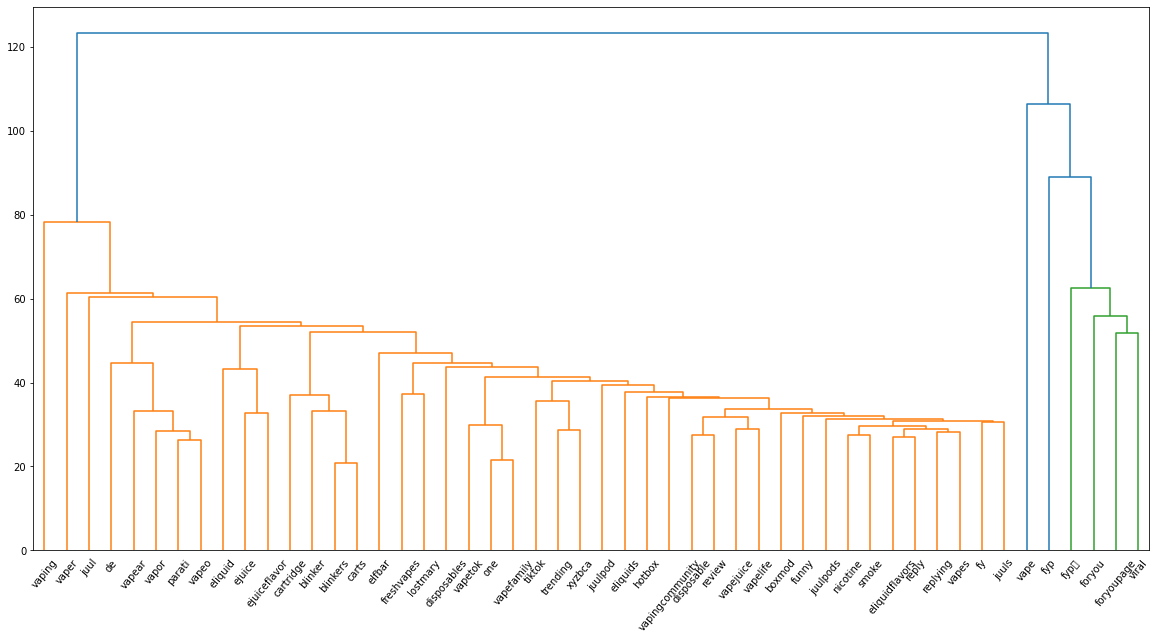

In [186]:
#https://m.blog.naver.com/j7youngh/222864205826

from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import pyplot as plt

# 군집 방식은 ward로 거리는 유크리디안으로 측정해 군집분석

clusters = linkage(df_words, method='ward', metric='euclidean')

# 덴드로그램 그리기

plt.figure(figsize=(20, 10))               # 이미지 크기 설정
dendrogram(clusters,
           leaf_rotation=50,               # 라벨 50% 기울리기
           leaf_font_size=10,              # 라벨 폰트 크기
           labels=df_words.index)          # 라벨에 사용할 변수
plt.show()

In [187]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
predict = ward.fit_predict(df_words)      # 군집 3개 분리값(0, 1, 2)
df_words['predict'] = predict             # 해당 군집값(0, 1, 2)을 원본 데이터에 붙이기
df_words[:5]

,0,1,2,3,4,5,6,7,8,9,...,16188,16189,16190,16191,16192,16193,16194,16195,16196,predict
blinker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
blinkers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
boxmod,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
cartridge,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
carts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [188]:
cluster_1 = df_words[df_words['predict'] == 0].index
print("군집 1: ", cluster_1)
cluster_2 = df_words[df_words['predict'] == 1].index
print("군집 2: ", cluster_2)
cluster_3 = df_words[df_words['predict'] == 2].index
print("군집 3: ", cluster_3)
cluster_4 = df_words[df_words['predict'] == 3].index
print("군집 4: ", cluster_4)
cluster_5 = df_words[df_words['predict'] == 4].index
print("군집 5: ", cluster_5)

군집 1:  Index(['foryou', 'foryoupage', 'fypシ', 'viral'], dtype='object')
군집 2:  Index(['blinker', 'blinkers', 'boxmod', 'cartridge', 'carts', 'de',
       'disposable', 'disposables', 'ejuice', 'ejuiceflavor', 'elfbar',
       'eliquid', 'eliquidflavors', 'eliquids', 'freshvapes', 'funny', 'fy',
       'hotbox', 'juul', 'juulpod', 'juulpods', 'juuls', 'lostmary',
       'nicotine', 'one', 'parati', 'reply', 'replying', 'review', 'smoke',
       'tiktok', 'trending', 'vapear', 'vapefamily', 'vapejuice', 'vapelife',
       'vapeo', 'vaper', 'vapes', 'vapetok', 'vapingcommunity', 'vapor',
       'xyzbca'],
      dtype='object')
군집 3:  Index(['vape'], dtype='object')
군집 4:  Index(['fyp'], dtype='object')
군집 5:  Index(['vaping'], dtype='object')


In [189]:
# 주성분 분석(PCA)을 이용해 단어별 x, y 좌표 얻기

from sklearn.decomposition import PCA

pca = PCA(n_components=2)                         # 2차원 PCA 모델 설정
word_pca = pca.fit_transform(df_words.iloc[0:, :-1])    # 군집 변수('predict')를 제외하고 PCA 실행)
df_pca = pd.DataFrame(data=word_pca, index=[df_words.index], columns=['main1', 'main2'])
df_pca['predict']= predict
df_pca.tail()

,main1,main2,predict
vaping,13.993952,21.033902,4
vapingcommunity,-5.403942,1.855381,1
vapor,-4.795734,4.349705,1
viral,17.912593,-21.647198,0
xyzbca,-2.759046,-5.171373,1


/Users/sungwonj/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sungwonj/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0, flags=flags)


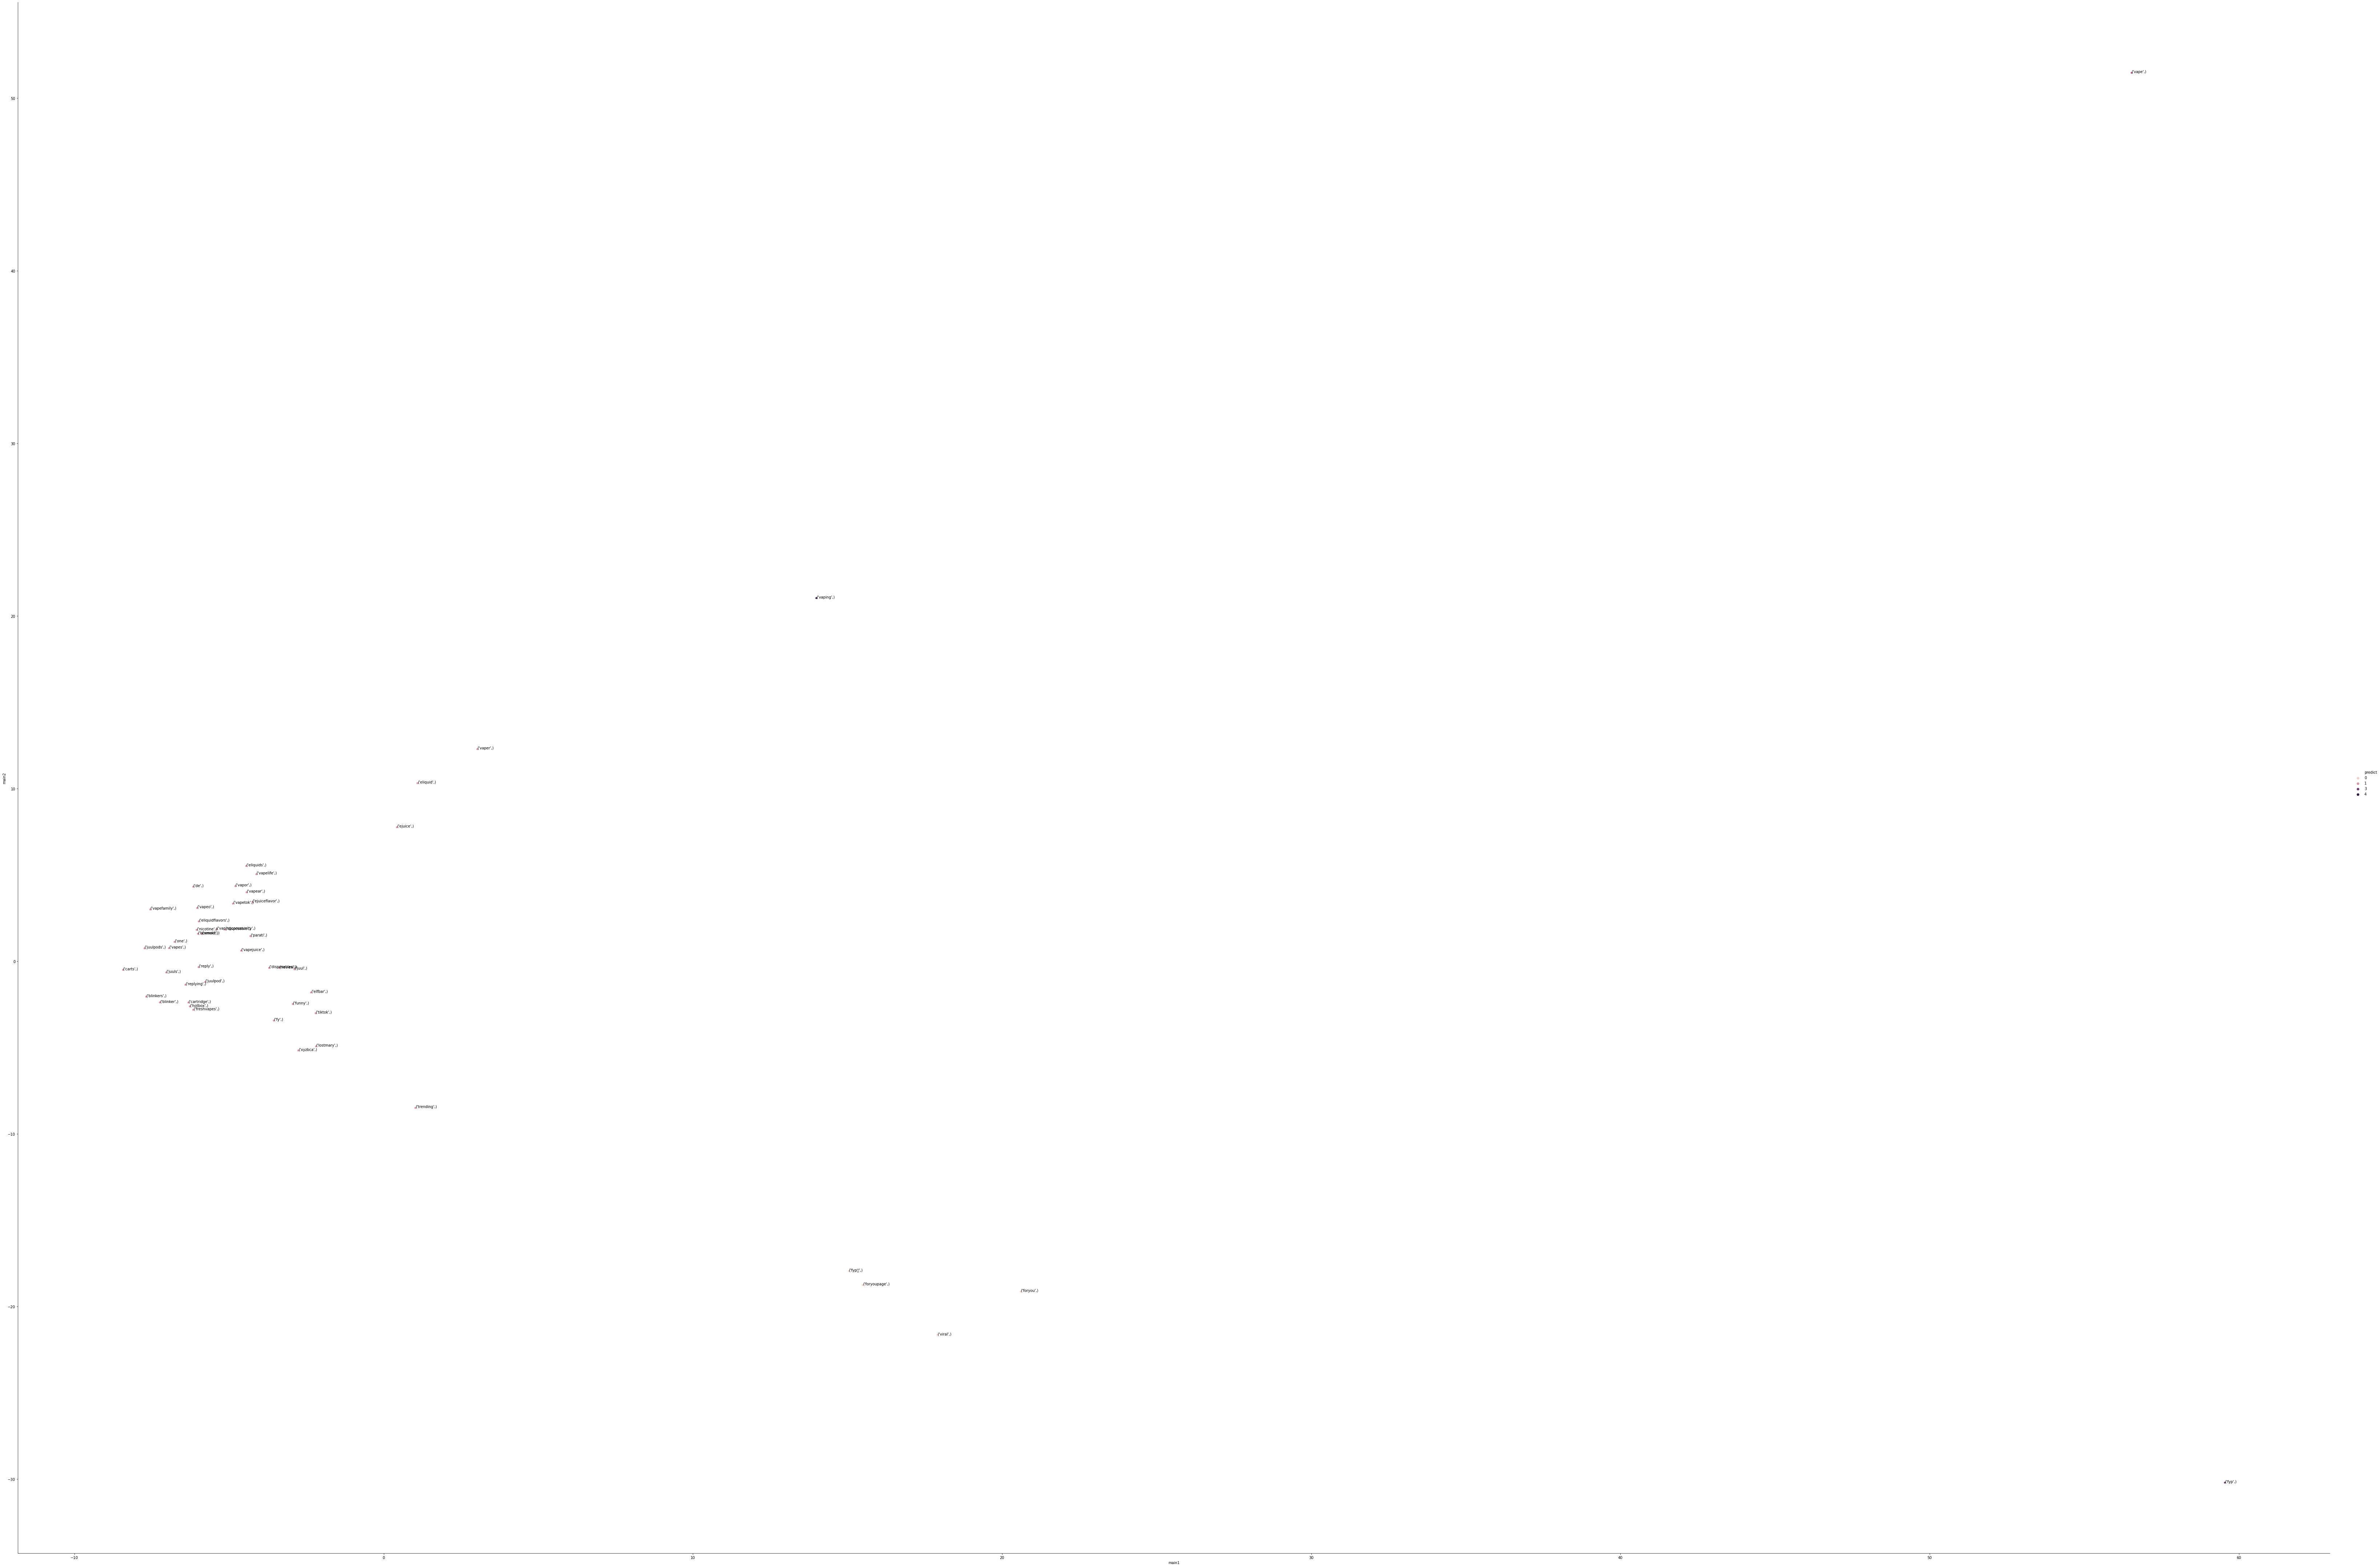

In [190]:

import seaborn as sns
import matplotlib.pyplot as plt

# seaborn을 이용해 산점도 그리기
sns.relplot('main1', 'main2', data=df_pca, height =60, aspect=1.5, hue='predict') 

# 산점도에 라벨링하기
for i, index in enumerate(df_pca.index):
    plt.text(df_pca.main1[i], df_pca.main2[i], index)
